In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from linearmodels import PanelOLS
import statsmodels.api as sm

In [2]:
data = pd.read_csv("Data/master_data_es_rob.csv")
data.drop(columns=["Unnamed: 0"], inplace=True)
data = data.dropna()

In [3]:
#sum stats
sum_stats = data[['price', 'vol', 'return', 'share_passive', '3day_vol', '5day_vol', '7day_vol']].describe()
sum_stats

,price,vol,return,share_passive,3day_vol,5day_vol,7day_vol
count,393281.000000,3.932810e+05,393281.000000,393281.000000,393281.000000,393281.000000,393281.000000
mean,59.461258,2.092997e+06,-0.000318,0.186226,1.047311,1.358525,1.608922
std,168.910513,9.858284e+06,0.046017,0.157509,3.490193,4.233334,4.919062
min,0.020100,0.000000e+00,-0.804171,0.000005,0.000000,0.000000,0.000516
25%,7.699900,1.468550e+05,-0.017610,0.052365,0.120968,0.176295,0.214143
50%,22.390000,4.905820e+05,-0.000427,0.153000,0.340196,0.471307,0.566653
75%,60.120000,1.483585e+06,0.015748,0.256024,0.926661,1.230987,1.466580
max,8382.630000,2.081916e+09,5.382716,0.948597,374.624792,355.788742,355.409237


In [4]:
sub1 = data[data['in_sp'] == 1]
sub2 = data[data['in_sp'] == 0]
sum_stats2 = sub1[['price', 'vol', 'return', 'share_passive', '3day_vol', '5day_vol', '7day_vol']].describe()
sum_stats2

,price,vol,return,share_passive,3day_vol,5day_vol,7day_vol
count,48971.000000,4.897100e+04,48971.000000,48971.000000,48971.000000,48971.000000,48971.000000
mean,198.470355,5.155933e+06,0.000439,0.460855,2.832146,3.704672,4.427775
std,398.250082,1.462421e+07,0.021905,0.081610,7.665149,9.272991,10.859173
min,3.610000,9.457000e+03,-0.456763,0.000644,0.005773,0.018166,0.053852
25%,64.310000,1.022078e+06,-0.010323,0.421321,0.533870,0.784235,0.958318
50%,115.810000,2.033483e+06,0.000441,0.451566,1.180226,1.620515,1.976307
75%,214.135000,4.437356e+06,0.011299,0.487793,2.642877,3.500440,4.175512
max,8382.630000,8.089529e+08,0.280948,0.948597,374.624792,355.788742,355.409237


In [5]:
sum_stats3 = sub2[['price', 'vol', 'return', 'share_passive', '3day_vol', '5day_vol', '7day_vol']].describe()
sum_stats3

,price,vol,return,share_passive,3day_vol,5day_vol,7day_vol
count,344310.000000,3.443100e+05,344310.000000,344310.000000,344310.000000,344310.000000,344310.000000
mean,39.690079,1.657358e+06,-0.000426,0.147166,0.793455,1.024834,1.207999
std,83.016704,8.891943e+06,0.048481,0.123035,2.244995,2.710338,3.094545
min,0.020100,0.000000e+00,-0.804171,0.000005,0.000000,0.000000,0.000516
25%,6.420000,1.195830e+05,-0.019075,0.031008,0.105040,0.153604,0.186662
50%,17.890000,3.891215e+05,-0.000672,0.135389,0.282902,0.390474,0.472043
75%,43.050000,1.124668e+06,0.016667,0.218607,0.742047,0.978524,1.166432
max,2260.000000,2.081916e+09,5.382716,0.945118,233.471671,227.967276,226.915600


In [6]:
total_tickers = data['ticker'].unique().tolist()
print(len(total_tickers))

3997


In [7]:
data['passive_q'] = pd.qcut(data['share_passive'], q=4, labels=False) + 1

In [8]:
avg_3volatility = (data.groupby(['days_from_earn', 'passive_q'])['3day_vol'].mean().reset_index())

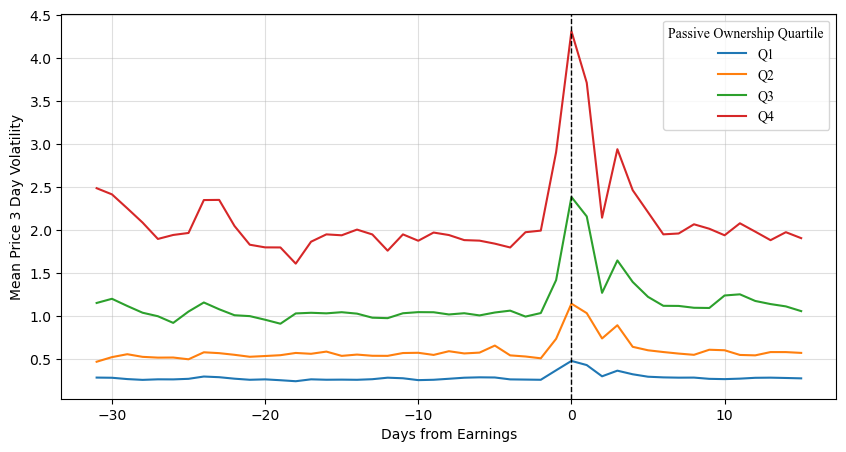

In [9]:
plt.figure(figsize=(10,5))
for q in sorted(data['passive_q'].unique()):
    subset = avg_3volatility[avg_3volatility['passive_q'] == q]
    plt.plot(subset['days_from_earn'], subset['3day_vol'], label=f'Q{q}')

plt.rcParams["font.family"] = "Times New Roman"

plt.axvline(0, color='black', linestyle='--', linewidth=1)

plt.xlabel('Days from Earnings')
plt.ylabel('Mean Price 3 Day Volatility')
plt.legend(title='Passive Ownership Quartile')
plt.grid(True, alpha = 0.4)
plt.savefig("Graphs/3vol_4q_rob.png")
plt.show()

In [10]:
avg_5volatility = (data.groupby(['days_from_earn', 'passive_q'])['5day_vol'].mean().reset_index())

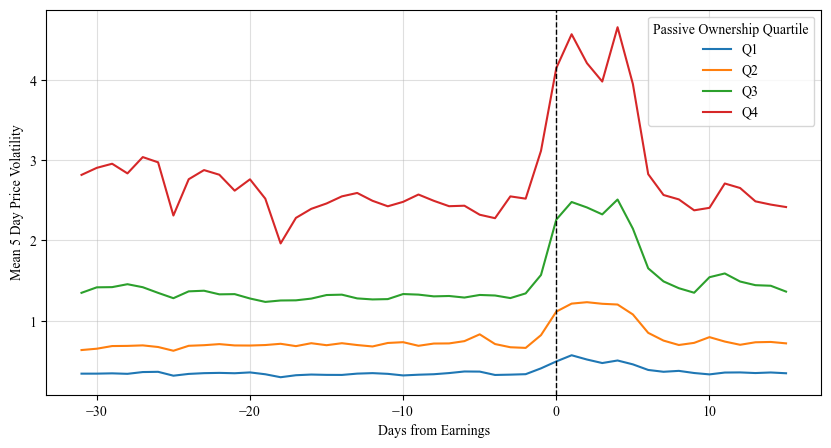

In [11]:
plt.figure(figsize=(10,5))
for q in sorted(data['passive_q'].unique()):
    subset = avg_5volatility[avg_5volatility['passive_q'] == q]
    plt.plot(subset['days_from_earn'], subset['5day_vol'], label=f'Q{q}')

plt.rcParams["font.family"] = "Times New Roman"

plt.axvline(0, color='black', linestyle='--', linewidth=1)

plt.xlabel('Days from Earnings')
plt.ylabel('Mean 5 Day Price Volatility')
plt.legend(title='Passive Ownership Quartile')
plt.grid(True, alpha = 0.4)
plt.savefig("Graphs/5vol_4q_rob.png")
plt.show()

In [12]:
avg_30volatility = (data.groupby(['days_from_earn', 'passive_q'])['7day_vol'].mean().reset_index())

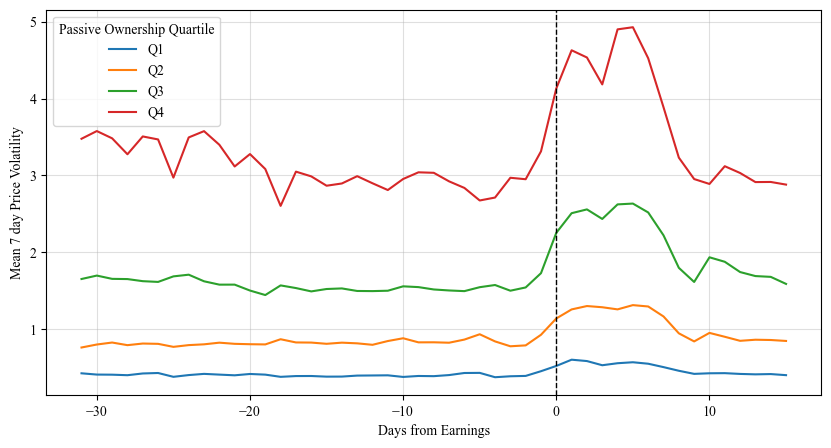

In [13]:
plt.figure(figsize=(10,5))
for q in sorted(data['passive_q'].unique()):
    subset = avg_30volatility[avg_30volatility['passive_q'] == q]
    plt.plot(subset['days_from_earn'], subset['7day_vol'], label=f'Q{q}')

plt.rcParams["font.family"] = "Times New Roman"

plt.axvline(0, color='black', linestyle='--', linewidth=1)

plt.xlabel('Days from Earnings')
plt.ylabel('Mean 7 day Price Volatility')
plt.legend(title='Passive Ownership Quartile')
plt.grid(True, alpha = 0.4)
plt.savefig("Graphs/7vol_4q_rob.png")
plt.show()

In [14]:
def event_study(data, level, cov, entity_fe = False, time_fe = False, cluster = False):
    if level == 3:
        for k in range(-29, 16):
            data[f'day_{k}'] = (data['days_from_earn'] == k).astype(int)
        data['Date'] = pd.to_datetime(data['Date'])
        df = data.set_index(['ticker', 'Date'])
        event_dummies = [f'day_{k}' for k in range(-29, 16) if k != -1]
        for k in range(-29, 16):
            if k != -1:
                df[f'day_{k}_passive'] = df[f'day_{k}'] * df['share_passive']
            
        passive = ['share_passive']

        X = df[event_dummies + [f'{d}_passive' for d in event_dummies] + passive]
        Y = df['3day_vol']
        model = PanelOLS(Y, X, entity_effects=entity_fe, time_effects=time_fe)
        res = model.fit(cov_type=cov, cluster_entity = cluster)
        return res
    elif level == 5:
        for k in range(-29, 16):
            data[f'day_{k}'] = (data['days_from_earn'] == k).astype(int)
        data['Date'] = pd.to_datetime(data['Date'])
        df = data.set_index(['ticker', 'Date'])
        event_dummies = [f'day_{k}' for k in range(-29, 16) if k != -1]
        for k in range(-29, 16):
            if k != -1:
                df[f'day_{k}_passive'] = df[f'day_{k}'] * df['share_passive']
            
        passive = ['share_passive']

        X = df[event_dummies + [f'{d}_passive' for d in event_dummies] + passive]
        Y = df['5day_vol']
        model = PanelOLS(Y, X, entity_effects=entity_fe, time_effects=time_fe)
        res = model.fit(cov_type=cov, cluster_entity = cluster)
        return res
    elif level == 7:
        for k in range(-29, 16):
            data[f'day_{k}'] = (data['days_from_earn'] == k).astype(int)
        data['Date'] = pd.to_datetime(data['Date'])
        df = data.set_index(['ticker', 'Date'])
        event_dummies = [f'day_{k}' for k in range(-29, 16) if k != -1]
        for k in range(-29, 16):
            if k != -1:
                df[f'day_{k}_passive'] = df[f'day_{k}'] * df['share_passive']
             
        passive = ['share_passive']

        X = df[event_dummies + [f'{d}_passive' for d in event_dummies] + passive]
        Y = df['7day_vol']
        model = PanelOLS(Y, X, entity_effects=entity_fe, time_effects=time_fe)
        res = model.fit(cov_type=cov, cluster_entity = cluster)
        return res

In [15]:
res = event_study(data, 3, 'clustered', False, False, True)
print(res.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:               3day_vol   R-squared:                        0.1274
Estimator:                   PanelOLS   R-squared (Between):              0.2266
No. Observations:              393281   R-squared (Within):               0.0150
Date:                Thu, Nov 06 2025   R-squared (Overall):              0.1274
Time:                        18:32:41   Log-likelihood                 -1.04e+06
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      644.86
Entities:                        3997   P-value                           0.0000
Avg Obs:                       98.394   Distribution:               F(89,393192)
Min Obs:                       2.0000                                           
Max Obs:                       136.00   F-statistic (robust):             27.208
                            

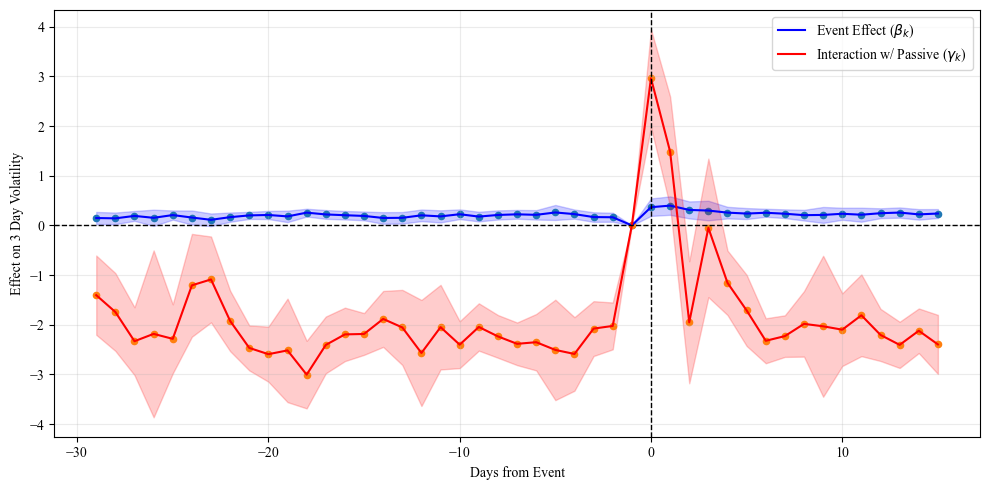

In [16]:
days = list(range(-29, 16))

def get_coef(key):
    return float(res.params.get(key, 0.0))

def get_se(key):
    return float(res.std_errors.get(key, 0.0))

# Build arrays for betas and gammas, with explicit 0 at day -1
betas = []
beta_se = []
gammas = []
gamma_se = []

for k in days:
    if k == -1:
        # omitted baseline: coefficient = 0, se = 0
        betas.append(0.0)
        beta_se.append(0.0)
        gammas.append(0.0)
        gamma_se.append(0.0)
    else:
        betas.append(get_coef(f'day_{k}'))
        beta_se.append(get_se(f'day_{k}'))
        gammas.append(get_coef(f'day_{k}_passive'))
        gamma_se.append(get_se(f'day_{k}_passive'))

betas = np.array(betas)
beta_se = np.array(beta_se)
gammas = np.array(gammas)
gamma_se = np.array(gamma_se)

# 95% CI bounds
beta_lower = betas - 1.96 * beta_se
beta_upper = betas + 1.96 * beta_se
gamma_lower = gammas - 1.96 * gamma_se
gamma_upper = gammas + 1.96 * gamma_se

# Plot: lines + shaded 95% CI + dots

plt.figure(figsize=(10,5))
plt.rcParams["font.family"] = "Times New Roman"

# βk
plt.plot(days, betas, label=r'Event Effect ($\beta_{k}$)', linewidth=1.5, color='blue')
plt.fill_between(days, beta_lower, beta_upper, alpha=0.2, color='blue')
plt.scatter(days, betas, s=20)

# γk
plt.plot(days, gammas, label=r'Interaction w/ Passive ($\gamma_{k}$)', linewidth=1.5, color='red')
plt.fill_between(days, gamma_lower, gamma_upper, alpha=0.2, color='red')
plt.scatter(days, gammas, s=20)

# Reference lines
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.xlabel('Days from Event')
plt.ylabel('Effect on 3 Day Volatility')

plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.savefig("Graphs/3vol_es_rob.png")
plt.show()

In [17]:
res = event_study(data, 5, 'clustered', False, False, True)
print(res.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:               5day_vol   R-squared:                        0.1425
Estimator:                   PanelOLS   R-squared (Between):              0.2247
No. Observations:              393281   R-squared (Within):               0.0150
Date:                Thu, Nov 06 2025   R-squared (Overall):              0.1425
Time:                        18:32:57   Log-likelihood                -1.115e+06
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      734.18
Entities:                        3997   P-value                           0.0000
Avg Obs:                       98.394   Distribution:               F(89,393192)
Min Obs:                       2.0000                                           
Max Obs:                       136.00   F-statistic (robust):             28.291
                            

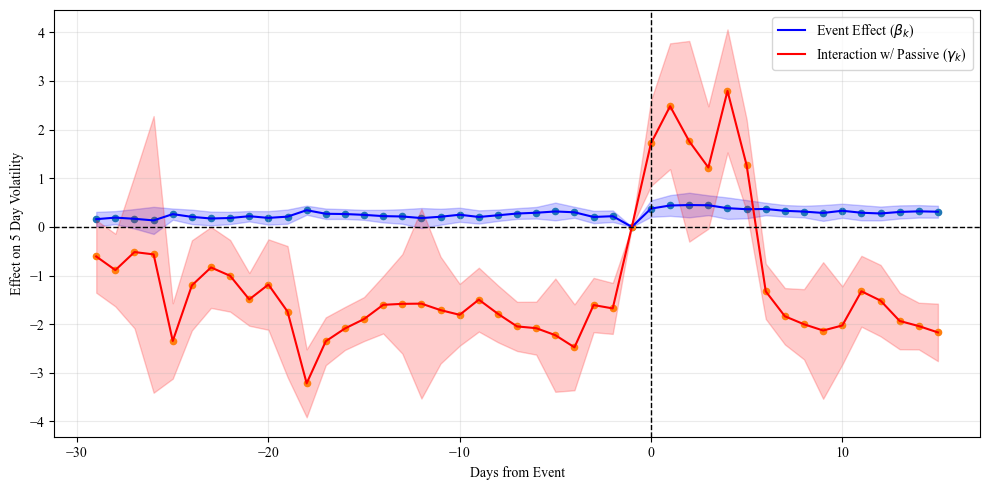

In [18]:
days = list(range(-29, 16))

def get_coef(key):
    return float(res.params.get(key, 0.0))

def get_se(key):
    return float(res.std_errors.get(key, 0.0))

# Build arrays for betas and gammas, with explicit 0 at day -1
betas = []
beta_se = []
gammas = []
gamma_se = []

for k in days:
    if k == -1:
        # omitted baseline: coefficient = 0, se = 0
        betas.append(0.0)
        beta_se.append(0.0)
        gammas.append(0.0)
        gamma_se.append(0.0)
    else:
        betas.append(get_coef(f'day_{k}'))
        beta_se.append(get_se(f'day_{k}'))
        gammas.append(get_coef(f'day_{k}_passive'))
        gamma_se.append(get_se(f'day_{k}_passive'))

betas = np.array(betas)
beta_se = np.array(beta_se)
gammas = np.array(gammas)
gamma_se = np.array(gamma_se)

# 95% CI bounds
beta_lower = betas - 1.96 * beta_se
beta_upper = betas + 1.96 * beta_se
gamma_lower = gammas - 1.96 * gamma_se
gamma_upper = gammas + 1.96 * gamma_se

# Plot: lines + shaded 95% CI + dots

plt.figure(figsize=(10,5))
plt.rcParams["font.family"] = "Times New Roman"

# βk
plt.plot(days, betas, label=r'Event Effect ($\beta_{k}$)', linewidth=1.5, color='blue')
plt.fill_between(days, beta_lower, beta_upper, alpha=0.2, color='blue')
plt.scatter(days, betas, s=20)

# γk
plt.plot(days, gammas, label=r'Interaction w/ Passive ($\gamma_{k}$)', linewidth=1.5, color='red')
plt.fill_between(days, gamma_lower, gamma_upper, alpha=0.2, color='red')
plt.scatter(days, gammas, s=20)

# Reference lines
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.xlabel('Days from Event')
plt.ylabel('Effect on 5 Day Volatility')

plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.savefig("Graphs/5vol_es_rob.png")
plt.show()

In [19]:
res = event_study(data, 7, 'clustered', False, False, True)
print(res.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:               7day_vol   R-squared:                        0.1466
Estimator:                   PanelOLS   R-squared (Between):              0.2237
No. Observations:              393281   R-squared (Within):               0.0125
Date:                Thu, Nov 06 2025   R-squared (Overall):              0.1466
Time:                        18:33:10   Log-likelihood                -1.173e+06
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      758.89
Entities:                        3997   P-value                           0.0000
Avg Obs:                       98.394   Distribution:               F(89,393192)
Min Obs:                       2.0000                                           
Max Obs:                       136.00   F-statistic (robust):             29.311
                            

/opt/anaconda3/envs/econ/lib/python3.11/site-packages/linearmodels/panel/model.py:128: RuntimeWarning: overflow encountered in matmul
  test_stat = test_params.T @ np.linalg.inv(test_cov) @ test_params


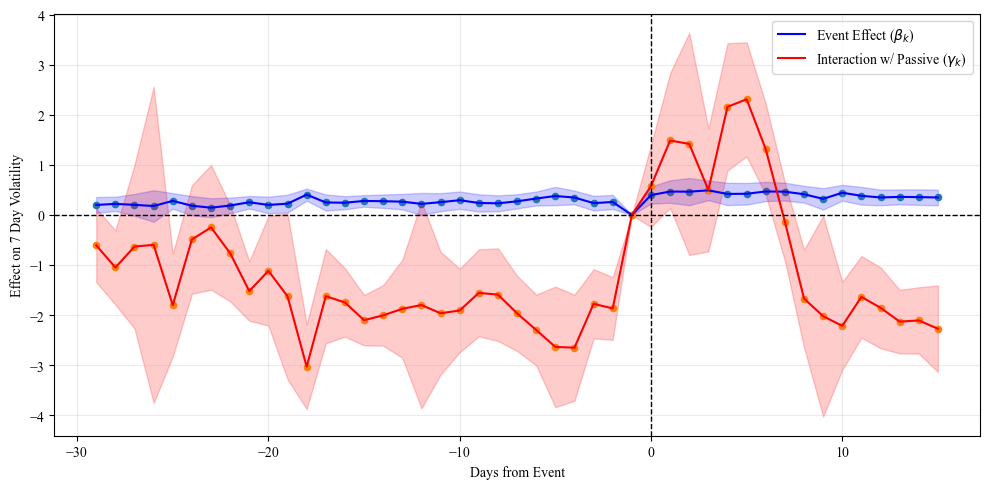

In [20]:
days = list(range(-29, 16))

def get_coef(key):
    return float(res.params.get(key, 0.0))

def get_se(key):
    return float(res.std_errors.get(key, 0.0))

# Build arrays for betas and gammas, with explicit 0 at day -1
betas = []
beta_se = []
gammas = []
gamma_se = []

for k in days:
    if k == -1:
        # omitted baseline: coefficient = 0, se = 0
        betas.append(0.0)
        beta_se.append(0.0)
        gammas.append(0.0)
        gamma_se.append(0.0)
    else:
        betas.append(get_coef(f'day_{k}'))
        beta_se.append(get_se(f'day_{k}'))
        gammas.append(get_coef(f'day_{k}_passive'))
        gamma_se.append(get_se(f'day_{k}_passive'))

betas = np.array(betas)
beta_se = np.array(beta_se)
gammas = np.array(gammas)
gamma_se = np.array(gamma_se)

# 95% CI bounds
beta_lower = betas - 1.96 * beta_se
beta_upper = betas + 1.96 * beta_se
gamma_lower = gammas - 1.96 * gamma_se
gamma_upper = gammas + 1.96 * gamma_se

# Plot: lines + shaded 95% CI + dots

plt.figure(figsize=(10,5))
plt.rcParams["font.family"] = "Times New Roman"

# βk
plt.plot(days, betas, label=r'Event Effect ($\beta_{k}$)', linewidth=1.5, color='blue')
plt.fill_between(days, beta_lower, beta_upper, alpha=0.2, color='blue')
plt.scatter(days, betas, s=20)

# γk
plt.plot(days, gammas, label=r'Interaction w/ Passive ($\gamma_{k}$)', linewidth=1.5, color='red')
plt.fill_between(days, gamma_lower, gamma_upper, alpha=0.2, color='red')
plt.scatter(days, gammas, s=20)

# Reference lines
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.xlabel('Days from Event')
plt.ylabel('Effect on 7 Day Volatility')

plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.savefig("Graphs/7vol_es_rob.png")
plt.show()

In [21]:
data_cont = pd.read_csv("Data/master_data_es_controls_rob.csv")
data_cont.drop(columns=["Unnamed: 0"], inplace=True)
data_cont = data_cont.dropna()

In [22]:
data_cont.columns

Index(['Date', 'ticker', 'price', 'vol', 'return', 'share_passive',
       'shares_outstanding', 'days_from_earn', 'sp_ret',
       'earnings_date_nearest', '3day_vol', '5day_vol', '7day_vol',
       'abnormal_return_ar1', 'abnormal_return_mkt', 'abnormal_return_sp',
       'in_sp', 'sector', 'ta', 'cash_sinvest', 'long_debt_tot', 'rev',
       'net_inc', 'eps'],
      dtype='object')

In [23]:
sum_stats_cont = data_cont[['price', 'vol', 'return', 'share_passive', '3day_vol', '5day_vol', '7day_vol']].describe()
sum_stats_cont

,price,vol,return,share_passive,3day_vol,5day_vol,7day_vol
count,328775.000000,3.287750e+05,328775.000000,328775.000000,328775.000000,328775.000000,328775.000000
mean,59.978629,2.116913e+06,-0.000437,0.185869,1.063709,1.379671,1.634457
std,175.953129,9.478160e+06,0.046837,0.157087,3.654902,4.434258,5.160915
min,0.020100,0.000000e+00,-0.804171,0.000005,0.000000,0.000000,0.000516
25%,7.030000,1.694880e+05,-0.018437,0.047000,0.117721,0.171406,0.207318
50%,21.010000,5.266950e+05,-0.000631,0.153338,0.339559,0.471731,0.566626
75%,61.230000,1.520096e+06,0.016151,0.257280,0.944475,1.252733,1.489613
max,8382.630000,2.081916e+09,5.382716,0.947847,374.624792,355.788742,355.409237


In [24]:
total_tickers = data_cont['ticker'].unique().tolist()
print(len(total_tickers))

3497


In [25]:
for k in range(-29, 16):
    data_cont[f'day_{k}'] = (data_cont['days_from_earn'] == k).astype(int)

data_cont['Date'] = pd.to_datetime(data_cont['Date'])
df = data_cont.set_index(['ticker', 'Date'])

event_dummies = [f'day_{k}' for k in range(-29, 16) if k != -1]
interaction_terms = [f'{d}_passive' for d in event_dummies]

for k in range(-29, 16):
    if k != -1:
        df[f'day_{k}_passive'] = df[f'day_{k}'] * df['share_passive']

sector_dummies = pd.get_dummies(df['sector'], prefix='sector', drop_first=True)
df = pd.concat([df, sector_dummies], axis=1)

controls = ['share_passive', 'ta', 'cash_sinvest', 'long_debt_tot', 'rev', 'net_inc', 'eps', 'vol']

X_vars = event_dummies + interaction_terms + controls + list(sector_dummies.columns)
X = df[X_vars]
Y = df['3day_vol']

model = PanelOLS(Y, X, entity_effects=False, time_effects=False)
res = model.fit(cov_type='clustered', cluster_entity=True)

print(res.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:               3day_vol   R-squared:                        0.2122
Estimator:                   PanelOLS   R-squared (Between):              0.2871
No. Observations:              328775   R-squared (Within):              -0.0078
Date:                Thu, Nov 06 2025   R-squared (Overall):              0.2122
Time:                        18:33:26   Log-likelihood                -8.668e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      835.31
Entities:                        3497   P-value                           0.0000
Avg Obs:                       94.016   Distribution:              F(106,328669)
Min Obs:                       1.0000                                           
Max Obs:                       136.00   F-statistic (robust):             26.283
                            

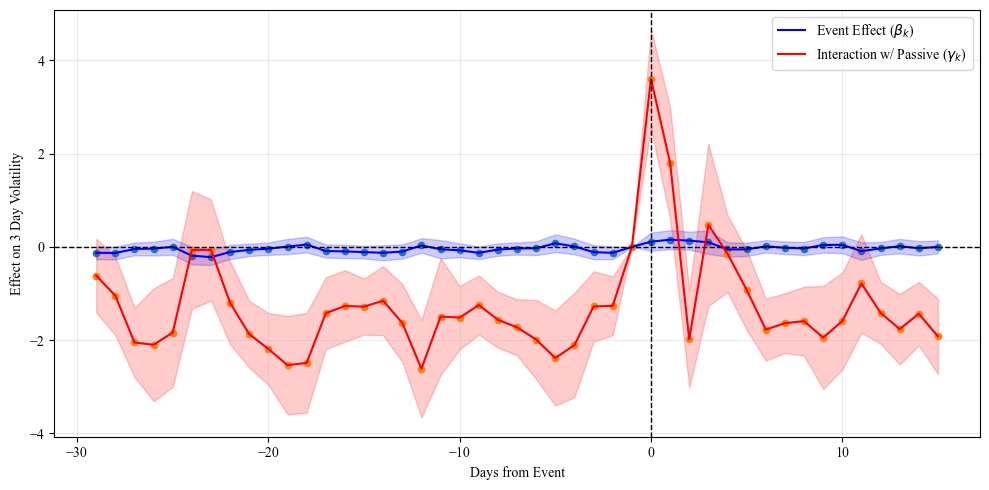

In [26]:
days = list(range(-29, 16))

def get_coef(key):
    return float(res.params.get(key, 0.0))

def get_se(key):
    return float(res.std_errors.get(key, 0.0))

# Build arrays for betas and gammas, with explicit 0 at day -1
betas = []
beta_se = []
gammas = []
gamma_se = []

for k in days:
    if k == -1:
        # omitted baseline: coefficient = 0, se = 0
        betas.append(0.0)
        beta_se.append(0.0)
        gammas.append(0.0)
        gamma_se.append(0.0)
    else:
        betas.append(get_coef(f'day_{k}'))
        beta_se.append(get_se(f'day_{k}'))
        gammas.append(get_coef(f'day_{k}_passive'))
        gamma_se.append(get_se(f'day_{k}_passive'))

betas = np.array(betas)
beta_se = np.array(beta_se)
gammas = np.array(gammas)
gamma_se = np.array(gamma_se)

# 95% CI bounds
beta_lower = betas - 1.96 * beta_se
beta_upper = betas + 1.96 * beta_se
gamma_lower = gammas - 1.96 * gamma_se
gamma_upper = gammas + 1.96 * gamma_se

# Plot: lines + shaded 95% CI + dots

plt.figure(figsize=(10,5))
plt.rcParams["font.family"] = "Times New Roman"

# βk
plt.plot(days, betas, label=r'Event Effect ($\beta_{k}$)', linewidth=1.5, color='blue')
plt.fill_between(days, beta_lower, beta_upper, alpha=0.2, color='blue')
plt.scatter(days, betas, s=20)

# γk
plt.plot(days, gammas, label=r'Interaction w/ Passive ($\gamma_{k}$)', linewidth=1.5, color='red')
plt.fill_between(days, gamma_lower, gamma_upper, alpha=0.2, color='red')
plt.scatter(days, gammas, s=20)

# Reference lines
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.xlabel('Days from Event')
plt.ylabel('Effect on 3 Day Volatility')

plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.savefig("Graphs/3vol_es_cont_rob.png")
plt.show()

In [27]:
for k in range(-29, 16):
    data_cont[f'day_{k}'] = (data_cont['days_from_earn'] == k).astype(int)

data_cont['Date'] = pd.to_datetime(data_cont['Date'])
df = data_cont.set_index(['ticker', 'Date'])

event_dummies = [f'day_{k}' for k in range(-29, 16) if k != -1]
interaction_terms = [f'{d}_passive' for d in event_dummies]

for k in range(-29, 16):
    if k != -1:
        df[f'day_{k}_passive'] = df[f'day_{k}'] * df['share_passive']

sector_dummies = pd.get_dummies(df['sector'], prefix='sector', drop_first=True)
df = pd.concat([df, sector_dummies], axis=1)

controls = ['share_passive', 'ta', 'cash_sinvest', 'long_debt_tot', 'rev', 'net_inc', 'eps', 'vol']

X_vars = event_dummies + interaction_terms + controls + list(sector_dummies.columns)
X = df[X_vars]
Y = df['5day_vol']

model = PanelOLS(Y, X, entity_effects=False, time_effects=False)
res = model.fit(cov_type='clustered', cluster_entity=True)

print(res.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:               5day_vol   R-squared:                        0.2407
Estimator:                   PanelOLS   R-squared (Between):              0.2857
No. Observations:              328775   R-squared (Within):              -0.0200
Date:                Thu, Nov 06 2025   R-squared (Overall):              0.2407
Time:                        18:33:39   Log-likelihood                -9.261e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      982.98
Entities:                        3497   P-value                           0.0000
Avg Obs:                       94.016   Distribution:              F(106,328669)
Min Obs:                       1.0000                                           
Max Obs:                       136.00   F-statistic (robust):             27.535
                            

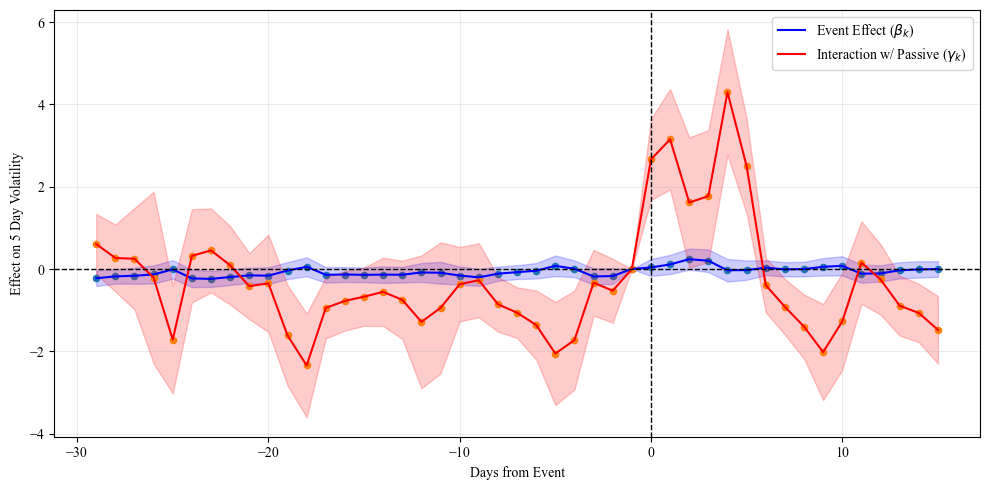

In [28]:
days = list(range(-29, 16))

def get_coef(key):
    return float(res.params.get(key, 0.0))

def get_se(key):
    return float(res.std_errors.get(key, 0.0))

# Build arrays for betas and gammas, with explicit 0 at day -1
betas = []
beta_se = []
gammas = []
gamma_se = []

for k in days:
    if k == -1:
        # omitted baseline: coefficient = 0, se = 0
        betas.append(0.0)
        beta_se.append(0.0)
        gammas.append(0.0)
        gamma_se.append(0.0)
    else:
        betas.append(get_coef(f'day_{k}'))
        beta_se.append(get_se(f'day_{k}'))
        gammas.append(get_coef(f'day_{k}_passive'))
        gamma_se.append(get_se(f'day_{k}_passive'))

betas = np.array(betas)
beta_se = np.array(beta_se)
gammas = np.array(gammas)
gamma_se = np.array(gamma_se)

# 95% CI bounds
beta_lower = betas - 1.96 * beta_se
beta_upper = betas + 1.96 * beta_se
gamma_lower = gammas - 1.96 * gamma_se
gamma_upper = gammas + 1.96 * gamma_se

# Plot: lines + shaded 95% CI + dots

plt.figure(figsize=(10,5))
plt.rcParams["font.family"] = "Times New Roman"

# βk
plt.plot(days, betas, label=r'Event Effect ($\beta_{k}$)', linewidth=1.5, color='blue')
plt.fill_between(days, beta_lower, beta_upper, alpha=0.2, color='blue')
plt.scatter(days, betas, s=20)

# γk
plt.plot(days, gammas, label=r'Interaction w/ Passive ($\gamma_{k}$)', linewidth=1.5, color='red')
plt.fill_between(days, gamma_lower, gamma_upper, alpha=0.2, color='red')
plt.scatter(days, gammas, s=20)

# Reference lines
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.xlabel('Days from Event')
plt.ylabel('Effect on 5 Day Volatility')

plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.savefig("Graphs/5vol_es_cont_rob.png")
plt.show()

In [29]:
for k in range(-29, 16):
    data_cont[f'day_{k}'] = (data_cont['days_from_earn'] == k).astype(int)

data_cont['Date'] = pd.to_datetime(data_cont['Date'])
df = data_cont.set_index(['ticker', 'Date'])

event_dummies = [f'day_{k}' for k in range(-29, 16) if k != -1]
interaction_terms = [f'{d}_passive' for d in event_dummies]

for k in range(-29, 16):
    if k != -1:
        df[f'day_{k}_passive'] = df[f'day_{k}'] * df['share_passive']

sector_dummies = pd.get_dummies(df['sector'], prefix='sector', drop_first=True)
df = pd.concat([df, sector_dummies], axis=1)

controls = ['share_passive', 'ta', 'cash_sinvest', 'long_debt_tot', 'rev', 'net_inc', 'eps', 'vol']

X_vars = event_dummies + interaction_terms + controls + list(sector_dummies.columns)
X = df[X_vars]
Y = df['7day_vol']

model = PanelOLS(Y, X, entity_effects=False, time_effects=False)
res = model.fit(cov_type='clustered', cluster_entity=True)

print(res.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:               7day_vol   R-squared:                        0.2507
Estimator:                   PanelOLS   R-squared (Between):              0.2860
No. Observations:              328775   R-squared (Within):              -0.0290
Date:                Thu, Nov 06 2025   R-squared (Overall):              0.2507
Time:                        18:33:53   Log-likelihood                -9.743e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1037.6
Entities:                        3497   P-value                           0.0000
Avg Obs:                       94.016   Distribution:              F(106,328669)
Min Obs:                       1.0000                                           
Max Obs:                       136.00   F-statistic (robust):             27.757
                            

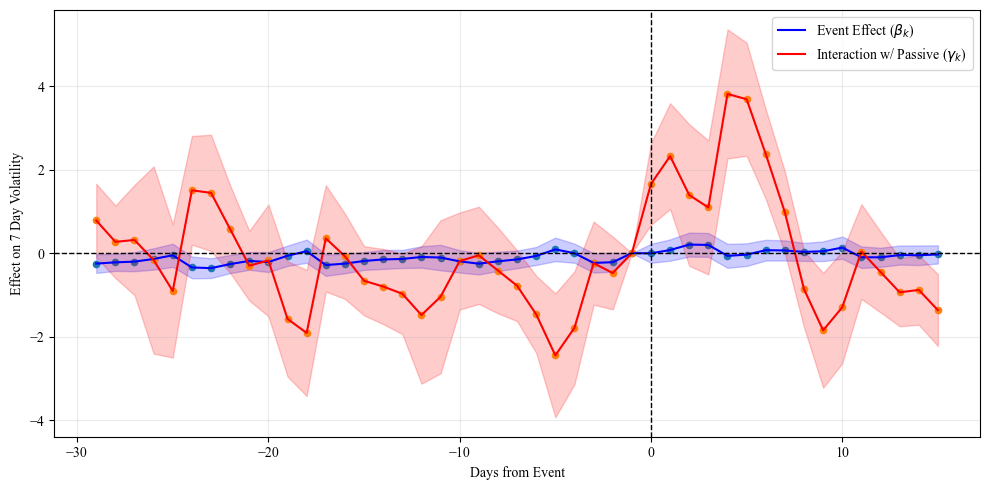

In [30]:
days = list(range(-29, 16))

def get_coef(key):
    return float(res.params.get(key, 0.0))

def get_se(key):
    return float(res.std_errors.get(key, 0.0))

# Build arrays for betas and gammas, with explicit 0 at day -1
betas = []
beta_se = []
gammas = []
gamma_se = []

for k in days:
    if k == -1:
        # omitted baseline: coefficient = 0, se = 0
        betas.append(0.0)
        beta_se.append(0.0)
        gammas.append(0.0)
        gamma_se.append(0.0)
    else:
        betas.append(get_coef(f'day_{k}'))
        beta_se.append(get_se(f'day_{k}'))
        gammas.append(get_coef(f'day_{k}_passive'))
        gamma_se.append(get_se(f'day_{k}_passive'))

betas = np.array(betas)
beta_se = np.array(beta_se)
gammas = np.array(gammas)
gamma_se = np.array(gamma_se)

# 95% CI bounds
beta_lower = betas - 1.96 * beta_se
beta_upper = betas + 1.96 * beta_se
gamma_lower = gammas - 1.96 * gamma_se
gamma_upper = gammas + 1.96 * gamma_se

# Plot: lines + shaded 95% CI + dots

plt.figure(figsize=(10,5))
plt.rcParams["font.family"] = "Times New Roman"

# βk
plt.plot(days, betas, label=r'Event Effect ($\beta_{k}$)', linewidth=1.5, color='blue')
plt.fill_between(days, beta_lower, beta_upper, alpha=0.2, color='blue')
plt.scatter(days, betas, s=20)

# γk
plt.plot(days, gammas, label=r'Interaction w/ Passive ($\gamma_{k}$)', linewidth=1.5, color='red')
plt.fill_between(days, gamma_lower, gamma_upper, alpha=0.2, color='red')
plt.scatter(days, gammas, s=20)

# Reference lines
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.xlabel('Days from Event')
plt.ylabel('Effect on 7 Day Volatility')

plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.savefig("Graphs/7vol_es_cont_rob.png")
plt.show()

In [31]:
for k in range(-29, 16):
    data_cont[f'day_{k}'] = (data_cont['days_from_earn'] == k).astype(int)

data_cont['Date'] = pd.to_datetime(data_cont['Date'])
df = data_cont.set_index(['ticker', 'Date'])

event_dummies = [f'day_{k}' for k in range(-29, 16) if k != -1]
interaction_terms = [f'{d}_passive' for d in event_dummies]

for k in range(-29, 16):
    if k != -1:
        df[f'day_{k}_passive'] = df[f'day_{k}'] * df['share_passive']

controls = ['share_passive', 'ta', 'cash_sinvest', 'long_debt_tot', 'rev', 'net_inc', 'eps', 'vol']

X_vars = event_dummies + interaction_terms + controls
X = df[X_vars]
Y = df['3day_vol']

model = PanelOLS(Y, X, entity_effects=True, time_effects=False)
res = model.fit(cov_type='clustered', cluster_entity=True)

print(res.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:               3day_vol   R-squared:                        0.0189
Estimator:                   PanelOLS   R-squared (Between):              0.0854
No. Observations:              328775   R-squared (Within):               0.0189
Date:                Thu, Nov 06 2025   R-squared (Overall):              0.0626
Time:                        18:34:10   Log-likelihood                -7.786e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      65.235
Entities:                        3497   P-value                           0.0000
Avg Obs:                       94.016   Distribution:               F(96,325182)
Min Obs:                       1.0000                                           
Max Obs:                       136.00   F-statistic (robust):             9.8180
                            

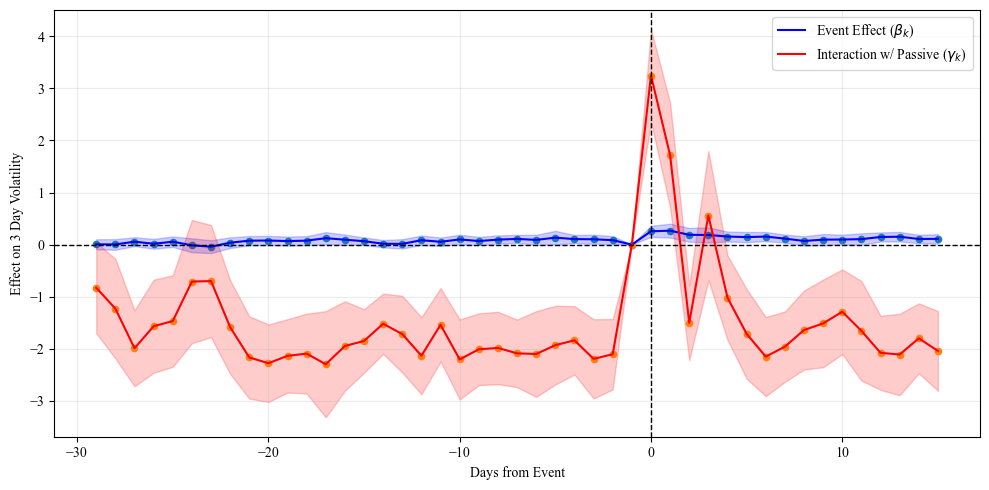

In [32]:
days = list(range(-29, 16))

def get_coef(key):
    return float(res.params.get(key, 0.0))

def get_se(key):
    return float(res.std_errors.get(key, 0.0))

# Build arrays for betas and gammas, with explicit 0 at day -1
betas = []
beta_se = []
gammas = []
gamma_se = []

for k in days:
    if k == -1:
        # omitted baseline: coefficient = 0, se = 0
        betas.append(0.0)
        beta_se.append(0.0)
        gammas.append(0.0)
        gamma_se.append(0.0)
    else:
        betas.append(get_coef(f'day_{k}'))
        beta_se.append(get_se(f'day_{k}'))
        gammas.append(get_coef(f'day_{k}_passive'))
        gamma_se.append(get_se(f'day_{k}_passive'))

betas = np.array(betas)
beta_se = np.array(beta_se)
gammas = np.array(gammas)
gamma_se = np.array(gamma_se)

# 95% CI bounds
beta_lower = betas - 1.96 * beta_se
beta_upper = betas + 1.96 * beta_se
gamma_lower = gammas - 1.96 * gamma_se
gamma_upper = gammas + 1.96 * gamma_se

# Plot: lines + shaded 95% CI + dots

plt.figure(figsize=(10,5))
plt.rcParams["font.family"] = "Times New Roman"

# βk
plt.plot(days, betas, label=r'Event Effect ($\beta_{k}$)', linewidth=1.5, color='blue')
plt.fill_between(days, beta_lower, beta_upper, alpha=0.2, color='blue')
plt.scatter(days, betas, s=20)

# γk
plt.plot(days, gammas, label=r'Interaction w/ Passive ($\gamma_{k}$)', linewidth=1.5, color='red')
plt.fill_between(days, gamma_lower, gamma_upper, alpha=0.2, color='red')
plt.scatter(days, gammas, s=20)

# Reference lines
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.xlabel('Days from Event')
plt.ylabel('Effect on 3 Day Volatility')

plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.savefig("Graphs/3vol_es_fe_rob.png")
plt.show()

In [33]:
for k in range(-29, 16):
    data_cont[f'day_{k}'] = (data_cont['days_from_earn'] == k).astype(int)

data_cont['Date'] = pd.to_datetime(data_cont['Date'])
df = data_cont.set_index(['ticker', 'Date'])

event_dummies = [f'day_{k}' for k in range(-29, 16) if k != -1]
interaction_terms = [f'{d}_passive' for d in event_dummies]

for k in range(-29, 16):
    if k != -1:
        df[f'day_{k}_passive'] = df[f'day_{k}'] * df['share_passive']

controls = ['share_passive', 'ta', 'cash_sinvest', 'long_debt_tot', 'rev', 'net_inc', 'eps', 'vol']

X_vars = event_dummies + interaction_terms + controls
X = df[X_vars]
Y = df['5day_vol']

model = PanelOLS(Y, X, entity_effects=True, time_effects=False)
res = model.fit(cov_type='clustered', cluster_entity=True)

print(res.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:               5day_vol   R-squared:                        0.0197
Estimator:                   PanelOLS   R-squared (Between):              0.0881
No. Observations:              328775   R-squared (Within):               0.0197
Date:                Thu, Nov 06 2025   R-squared (Overall):              0.0698
Time:                        18:34:27   Log-likelihood                -8.138e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      68.033
Entities:                        3497   P-value                           0.0000
Avg Obs:                       94.016   Distribution:               F(96,325182)
Min Obs:                       1.0000                                           
Max Obs:                       136.00   F-statistic (robust):             9.7820
                            

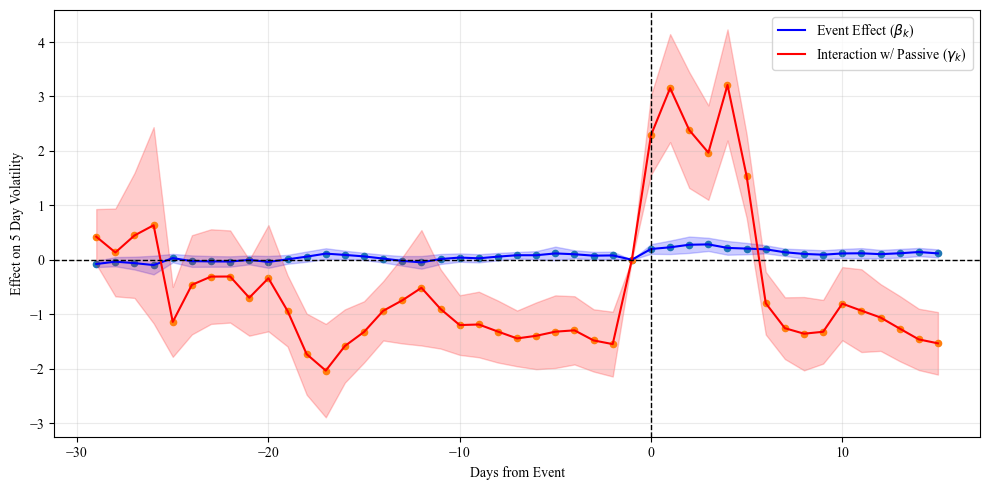

In [34]:
days = list(range(-29, 16))

def get_coef(key):
    return float(res.params.get(key, 0.0))

def get_se(key):
    return float(res.std_errors.get(key, 0.0))

# Build arrays for betas and gammas, with explicit 0 at day -1
betas = []
beta_se = []
gammas = []
gamma_se = []

for k in days:
    if k == -1:
        # omitted baseline: coefficient = 0, se = 0
        betas.append(0.0)
        beta_se.append(0.0)
        gammas.append(0.0)
        gamma_se.append(0.0)
    else:
        betas.append(get_coef(f'day_{k}'))
        beta_se.append(get_se(f'day_{k}'))
        gammas.append(get_coef(f'day_{k}_passive'))
        gamma_se.append(get_se(f'day_{k}_passive'))

betas = np.array(betas)
beta_se = np.array(beta_se)
gammas = np.array(gammas)
gamma_se = np.array(gamma_se)

# 95% CI bounds
beta_lower = betas - 1.96 * beta_se
beta_upper = betas + 1.96 * beta_se
gamma_lower = gammas - 1.96 * gamma_se
gamma_upper = gammas + 1.96 * gamma_se

# Plot: lines + shaded 95% CI + dots

plt.figure(figsize=(10,5))
plt.rcParams["font.family"] = "Times New Roman"

# βk
plt.plot(days, betas, label=r'Event Effect ($\beta_{k}$)', linewidth=1.5, color='blue')
plt.fill_between(days, beta_lower, beta_upper, alpha=0.2, color='blue')
plt.scatter(days, betas, s=20)

# γk
plt.plot(days, gammas, label=r'Interaction w/ Passive ($\gamma_{k}$)', linewidth=1.5, color='red')
plt.fill_between(days, gamma_lower, gamma_upper, alpha=0.2, color='red')
plt.scatter(days, gammas, s=20)

# Reference lines
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.xlabel('Days from Event')
plt.ylabel('Effect on 5 Day Volatility')

plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.savefig("Graphs/5vol_es_fe_rob.png")
plt.show()

In [35]:
for k in range(-29, 16):
    data_cont[f'day_{k}'] = (data_cont['days_from_earn'] == k).astype(int)

data_cont['Date'] = pd.to_datetime(data_cont['Date'])
df = data_cont.set_index(['ticker', 'Date'])

event_dummies = [f'day_{k}' for k in range(-29, 16) if k != -1]
interaction_terms = [f'{d}_passive' for d in event_dummies]

for k in range(-29, 16):
    if k != -1:
        df[f'day_{k}_passive'] = df[f'day_{k}'] * df['share_passive']

controls = ['share_passive', 'ta', 'cash_sinvest', 'long_debt_tot', 'rev', 'net_inc', 'eps', 'vol']

X_vars = event_dummies + interaction_terms + controls
X = df[X_vars]
Y = df['7day_vol']

model = PanelOLS(Y, X, entity_effects=True, time_effects=False)
res = model.fit(cov_type='clustered', cluster_entity=True)

print(res.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:               7day_vol   R-squared:                        0.0175
Estimator:                   PanelOLS   R-squared (Between):              0.1029
No. Observations:              328775   R-squared (Within):               0.0175
Date:                Thu, Nov 06 2025   R-squared (Overall):              0.0786
Time:                        18:34:45   Log-likelihood                -8.529e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      60.476
Entities:                        3497   P-value                           0.0000
Avg Obs:                       94.016   Distribution:               F(96,325182)
Min Obs:                       1.0000                                           
Max Obs:                       136.00   F-statistic (robust):             9.5137
                            

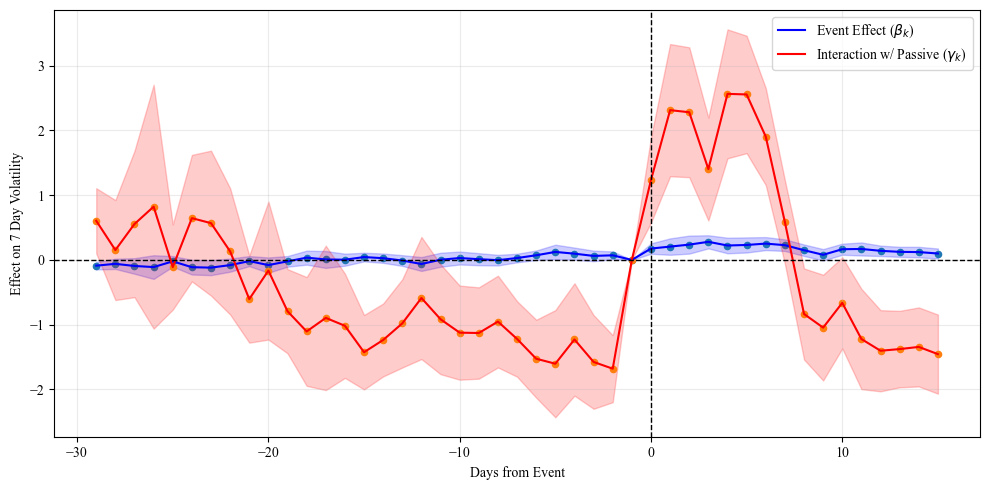

In [36]:
days = list(range(-29, 16))

def get_coef(key):
    return float(res.params.get(key, 0.0))

def get_se(key):
    return float(res.std_errors.get(key, 0.0))

# Build arrays for betas and gammas, with explicit 0 at day -1
betas = []
beta_se = []
gammas = []
gamma_se = []

for k in days:
    if k == -1:
        # omitted baseline: coefficient = 0, se = 0
        betas.append(0.0)
        beta_se.append(0.0)
        gammas.append(0.0)
        gamma_se.append(0.0)
    else:
        betas.append(get_coef(f'day_{k}'))
        beta_se.append(get_se(f'day_{k}'))
        gammas.append(get_coef(f'day_{k}_passive'))
        gamma_se.append(get_se(f'day_{k}_passive'))

betas = np.array(betas)
beta_se = np.array(beta_se)
gammas = np.array(gammas)
gamma_se = np.array(gamma_se)

# 95% CI bounds
beta_lower = betas - 1.96 * beta_se
beta_upper = betas + 1.96 * beta_se
gamma_lower = gammas - 1.96 * gamma_se
gamma_upper = gammas + 1.96 * gamma_se

# Plot: lines + shaded 95% CI + dots

plt.figure(figsize=(10,5))
plt.rcParams["font.family"] = "Times New Roman"

# βk
plt.plot(days, betas, label=r'Event Effect ($\beta_{k}$)', linewidth=1.5, color='blue')
plt.fill_between(days, beta_lower, beta_upper, alpha=0.2, color='blue')
plt.scatter(days, betas, s=20)

# γk
plt.plot(days, gammas, label=r'Interaction w/ Passive ($\gamma_{k}$)', linewidth=1.5, color='red')
plt.fill_between(days, gamma_lower, gamma_upper, alpha=0.2, color='red')
plt.scatter(days, gammas, s=20)

# Reference lines
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.xlabel('Days from Event')
plt.ylabel('Effect on 7 Day Volatility')

plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.savefig("Graphs/7vol_es_fe_rob.png")
plt.show()

In [37]:
#Stage one
df = data_cont.set_index(['ticker', 'Date'])
X = df[['share_passive']]
event_dummies = [f'day_{k}' for k in range(-29, 16) if k != -1]
interaction_terms = [f'{d}_passive' for d in event_dummies]
sector_dummies = pd.get_dummies(df['sector'], prefix='sector', drop_first=True, dtype=int)
df = pd.concat([df, sector_dummies], axis=1)
instrument = ['in_sp']
controls = ['ta', 'cash_sinvest', 'long_debt_tot', 'rev', 'net_inc', 'eps', 'vol']
z_vars2 = instrument + controls + list(sector_dummies.columns)
z = df[z_vars2]
Z = sm.add_constant(z)
model1 = sm.OLS(X, Z)
model1_robust = model1.fit(cov_type='HC3')
x_hat = model1_robust.predict(Z)
print(model1_robust.summary())

                            OLS Regression Results                            
Dep. Variable:          share_passive   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.379e+04
Date:                Thu, 06 Nov 2025   Prob (F-statistic):               0.00
Time:                        18:34:47   Log-Likelihood:             2.5328e+05
No. Observations:              328775   AIC:                        -5.065e+05
Df Residuals:                  328756   BIC:                        -5.063e+05
Df Model:                          18                                         
Covariance Type:                  HC3                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1284      0.001    131.519

/opt/anaconda3/envs/econ/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 18, but rank is 17
  warnings.warn('covariance of constraints does not have full '


In [38]:
print(model1_robust.f_test("in_sp = 0"))

<F test: F=226628.33539388972, p=0.0, df_denom=3.29e+05, df_num=1>


In [39]:
#stage two
data_cont['passive_hat'] = x_hat.reset_index()[[0]]

for k in range(-29, 16):
    data_cont[f'day_{k}'] = (data_cont['days_from_earn'] == k).astype(int)

for k in range(-29, 16):
    if k != -1:  
        data_cont[f'day_{k}_passive_hat'] = data_cont[f'day_{k}'] * data_cont['passive_hat']

event_dummies = [f'day_{k}' for k in range(-29, 16) if k != -1]
interaction_terms = [f'day_{k}_passive_hat' for k in range(-29, 16) if k != -1]

controls = ['passive_hat', 'ta', 'cash_sinvest', 'long_debt_tot', 'rev', 'net_inc', 'eps', 'vol']

X_vars = event_dummies + interaction_terms + controls

data_cont['Date'] = pd.to_datetime(data_cont['Date'])
df = data_cont.set_index(['ticker', 'Date'])

Y = df['3day_vol']
X = df[X_vars]

model2 = PanelOLS(Y, X, entity_effects=True, time_effects=False)
res2 = model2.fit(cov_type='clustered', cluster_entity=True)

print(res2.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:               3day_vol   R-squared:                        0.0191
Estimator:                   PanelOLS   R-squared (Between):              0.1376
No. Observations:              328775   R-squared (Within):               0.0191
Date:                Thu, Nov 06 2025   R-squared (Overall):              0.0890
Time:                        18:35:04   Log-likelihood                -7.786e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      65.802
Entities:                        3497   P-value                           0.0000
Avg Obs:                       94.016   Distribution:               F(96,325182)
Min Obs:                       1.0000                                           
Max Obs:                       136.00   F-statistic (robust):             8.8583
                            

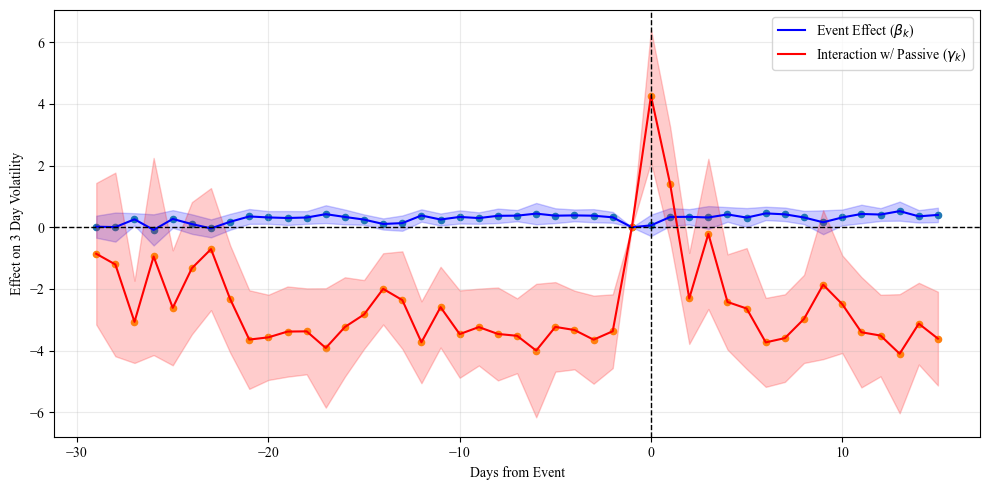

In [40]:
days = list(range(-29, 16))

def get_coef(key):
    return float(res2.params.get(key, 0.0))

def get_se(key):
    return float(res2.std_errors.get(key, 0.0))

# Build arrays for betas and gammas, with explicit 0 at day -1
betas = []
beta_se = []
gammas = []
gamma_se = []

for k in days:
    if k == -1:
        # omitted baseline: coefficient = 0, se = 0
        betas.append(0.0)
        beta_se.append(0.0)
        gammas.append(0.0)
        gamma_se.append(0.0)
    else:
        betas.append(get_coef(f'day_{k}'))
        beta_se.append(get_se(f'day_{k}'))
        gammas.append(get_coef(f'day_{k}_passive_hat'))
        gamma_se.append(get_se(f'day_{k}_passive_hat'))

betas = np.array(betas)
beta_se = np.array(beta_se)
gammas = np.array(gammas)
gamma_se = np.array(gamma_se)

# 95% CI bounds
beta_lower = betas - 1.96 * beta_se
beta_upper = betas + 1.96 * beta_se
gamma_lower = gammas - 1.96 * gamma_se
gamma_upper = gammas + 1.96 * gamma_se

# Plot: lines + shaded 95% CI + dots

plt.figure(figsize=(10,5))
plt.rcParams["font.family"] = "Times New Roman"

# βk
plt.plot(days, betas, label=r'Event Effect ($\beta_{k}$)', linewidth=1.5, color='blue')
plt.fill_between(days, beta_lower, beta_upper, alpha=0.2, color='blue')
plt.scatter(days, betas, s=20)

# γk
plt.plot(days, gammas, label=r'Interaction w/ Passive ($\gamma_{k}$)', linewidth=1.5, color='red')
plt.fill_between(days, gamma_lower, gamma_upper, alpha=0.2, color='red')
plt.scatter(days, gammas, s=20)

# Reference lines
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.xlabel('Days from Event')
plt.ylabel('Effect on 3 Day Volatility')

plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.savefig("Graphs/3vol_es_iv_rob.png")
plt.show()

In [41]:
data_cont['passive_hat'] = x_hat.reset_index()[[0]]

for k in range(-29, 16):
    data_cont[f'day_{k}'] = (data_cont['days_from_earn'] == k).astype(int)

for k in range(-29, 16):
    if k != -1:  
        data_cont[f'day_{k}_passive_hat'] = data_cont[f'day_{k}'] * data_cont['passive_hat']

event_dummies = [f'day_{k}' for k in range(-29, 16) if k != -1]
interaction_terms = [f'day_{k}_passive_hat' for k in range(-29, 16) if k != -1]

controls = ['passive_hat', 'ta', 'cash_sinvest', 'long_debt_tot', 'rev', 'net_inc', 'eps', 'vol']

X_vars = event_dummies + interaction_terms + controls

data_cont['Date'] = pd.to_datetime(data_cont['Date'])
df = data_cont.set_index(['ticker', 'Date'])

Y = df['5day_vol']
X = df[X_vars]

model2 = PanelOLS(Y, X, entity_effects=True, time_effects=False)
res2 = model2.fit(cov_type='clustered', cluster_entity=True)

print(res2.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:               5day_vol   R-squared:                        0.0200
Estimator:                   PanelOLS   R-squared (Between):              0.1389
No. Observations:              328775   R-squared (Within):               0.0200
Date:                Thu, Nov 06 2025   R-squared (Overall):              0.0984
Time:                        18:35:21   Log-likelihood                -8.137e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      69.127
Entities:                        3497   P-value                           0.0000
Avg Obs:                       94.016   Distribution:               F(96,325182)
Min Obs:                       1.0000                                           
Max Obs:                       136.00   F-statistic (robust):             8.9732
                            

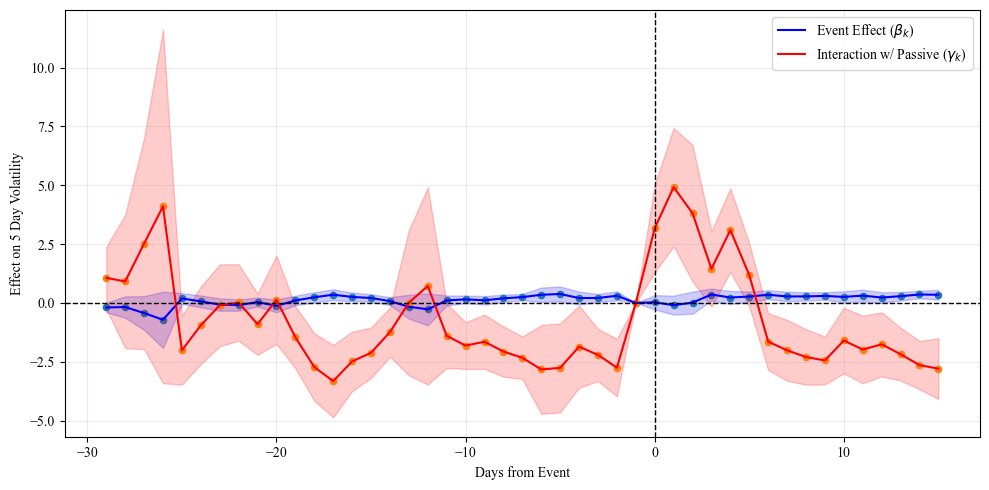

In [42]:
days = list(range(-29, 16))

def get_coef(key):
    return float(res2.params.get(key, 0.0))

def get_se(key):
    return float(res2.std_errors.get(key, 0.0))

# Build arrays for betas and gammas, with explicit 0 at day -1
betas = []
beta_se = []
gammas = []
gamma_se = []

for k in days:
    if k == -1:
        # omitted baseline: coefficient = 0, se = 0
        betas.append(0.0)
        beta_se.append(0.0)
        gammas.append(0.0)
        gamma_se.append(0.0)
    else:
        betas.append(get_coef(f'day_{k}'))
        beta_se.append(get_se(f'day_{k}'))
        gammas.append(get_coef(f'day_{k}_passive_hat'))
        gamma_se.append(get_se(f'day_{k}_passive_hat'))

betas = np.array(betas)
beta_se = np.array(beta_se)
gammas = np.array(gammas)
gamma_se = np.array(gamma_se)

# 95% CI bounds
beta_lower = betas - 1.96 * beta_se
beta_upper = betas + 1.96 * beta_se
gamma_lower = gammas - 1.96 * gamma_se
gamma_upper = gammas + 1.96 * gamma_se

# Plot: lines + shaded 95% CI + dots

plt.figure(figsize=(10,5))
plt.rcParams["font.family"] = "Times New Roman"

# βk
plt.plot(days, betas, label=r'Event Effect ($\beta_{k}$)', linewidth=1.5, color='blue')
plt.fill_between(days, beta_lower, beta_upper, alpha=0.2, color='blue')
plt.scatter(days, betas, s=20)

# γk
plt.plot(days, gammas, label=r'Interaction w/ Passive ($\gamma_{k}$)', linewidth=1.5, color='red')
plt.fill_between(days, gamma_lower, gamma_upper, alpha=0.2, color='red')
plt.scatter(days, gammas, s=20)

# Reference lines
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.xlabel('Days from Event')
plt.ylabel('Effect on 5 Day Volatility')

plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.savefig("Graphs/5vol_es_iv_rob.png")
plt.show()

In [43]:
for k in range(-29, 16):
    data_cont[f'day_{k}'] = (data_cont['days_from_earn'] == k).astype(int)

for k in range(-29, 16):
    if k != -1:  
        data_cont[f'day_{k}_passive_hat'] = data_cont[f'day_{k}'] * data_cont['passive_hat']

event_dummies = [f'day_{k}' for k in range(-29, 16) if k != -1]
interaction_terms = [f'day_{k}_passive_hat' for k in range(-29, 16) if k != -1]

controls = ['passive_hat', 'ta', 'cash_sinvest', 'long_debt_tot', 'rev', 'net_inc', 'eps', 'vol']

X_vars = event_dummies + interaction_terms + controls

data_cont['Date'] = pd.to_datetime(data_cont['Date'])
df = data_cont.set_index(['ticker', 'Date'])

Y = df['7day_vol']
X = df[X_vars]

model2 = PanelOLS(Y, X, entity_effects=True, time_effects=False)
res2 = model2.fit(cov_type='clustered', cluster_entity=True)

print(res2.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:               7day_vol   R-squared:                        0.0176
Estimator:                   PanelOLS   R-squared (Between):              0.1569
No. Observations:              328775   R-squared (Within):               0.0176
Date:                Thu, Nov 06 2025   R-squared (Overall):              0.1105
Time:                        18:35:39   Log-likelihood                -8.529e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      60.682
Entities:                        3497   P-value                           0.0000
Avg Obs:                       94.016   Distribution:               F(96,325182)
Min Obs:                       1.0000                                           
Max Obs:                       136.00   F-statistic (robust):             8.7071
                            

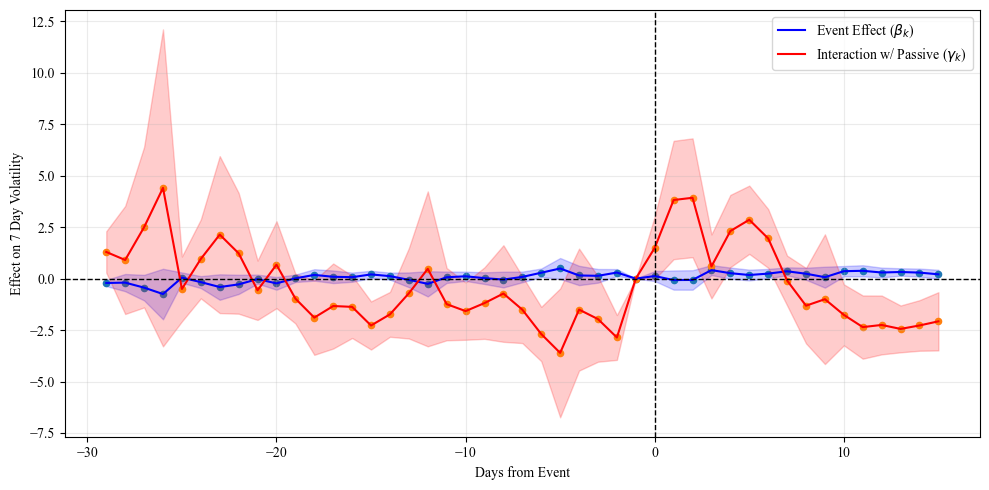

In [44]:
days = list(range(-29, 16))

def get_coef(key):
    return float(res2.params.get(key, 0.0))

def get_se(key):
    return float(res2.std_errors.get(key, 0.0))

# Build arrays for betas and gammas, with explicit 0 at day -1
betas = []
beta_se = []
gammas = []
gamma_se = []

for k in days:
    if k == -1:
        # omitted baseline: coefficient = 0, se = 0
        betas.append(0.0)
        beta_se.append(0.0)
        gammas.append(0.0)
        gamma_se.append(0.0)
    else:
        betas.append(get_coef(f'day_{k}'))
        beta_se.append(get_se(f'day_{k}'))
        gammas.append(get_coef(f'day_{k}_passive_hat'))
        gamma_se.append(get_se(f'day_{k}_passive_hat'))

betas = np.array(betas)
beta_se = np.array(beta_se)
gammas = np.array(gammas)
gamma_se = np.array(gamma_se)

# 95% CI bounds
beta_lower = betas - 1.96 * beta_se
beta_upper = betas + 1.96 * beta_se
gamma_lower = gammas - 1.96 * gamma_se
gamma_upper = gammas + 1.96 * gamma_se

# Plot: lines + shaded 95% CI + dots

plt.figure(figsize=(10,5))
plt.rcParams["font.family"] = "Times New Roman"

# βk
plt.plot(days, betas, label=r'Event Effect ($\beta_{k}$)', linewidth=1.5, color='blue')
plt.fill_between(days, beta_lower, beta_upper, alpha=0.2, color='blue')
plt.scatter(days, betas, s=20)

# γk
plt.plot(days, gammas, label=r'Interaction w/ Passive ($\gamma_{k}$)', linewidth=1.5, color='red')
plt.fill_between(days, gamma_lower, gamma_upper, alpha=0.2, color='red')
plt.scatter(days, gammas, s=20)

# Reference lines
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.xlabel('Days from Event')
plt.ylabel('Effect on 7 Day Volatility')

plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.savefig("Graphs/7vol_es_iv_rob.png")
plt.show()

In [45]:
for k in range(-29, 16):
    data_cont[f'day_{k}'] = (data_cont['days_from_earn'] == k).astype(int)

for k in range(-29, 16):
    if k != -1:  
        data_cont[f'day_{k}_passive_hat'] = data_cont[f'day_{k}'] * data_cont['passive_hat']

event_dummies = [f'day_{k}' for k in range(-29, 16) if k != -1]
interaction_terms = [f'day_{k}_passive_hat' for k in range(-29, 16) if k != -1]
sector_dummies = pd.get_dummies(df['sector'], prefix='sector', drop_first=True, dtype=int)
df = pd.concat([df, sector_dummies], axis=1)

controls = ['passive_hat', 'ta', 'cash_sinvest', 'long_debt_tot', 'rev', 'net_inc', 'eps', 'vol']

X_vars = event_dummies + interaction_terms + controls + list(sector_dummies.columns)

data_cont['Date'] = pd.to_datetime(data_cont['Date'])
df = data_cont.set_index(['ticker', 'Date'])
df = pd.concat([df, sector_dummies], axis=1)

Y = df['3day_vol']
X = df[X_vars]

model2 = PanelOLS(Y, X, entity_effects=False, time_effects=False)
res2 = model2.fit(cov_type='clustered', cluster_entity=True)

print(res2.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:               3day_vol   R-squared:                        0.2114
Estimator:                   PanelOLS   R-squared (Between):              0.2916
No. Observations:              328775   R-squared (Within):              -0.0087
Date:                Thu, Nov 06 2025   R-squared (Overall):              0.2114
Time:                        18:35:54   Log-likelihood                -8.669e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      831.24
Entities:                        3497   P-value                           0.0000
Avg Obs:                       94.016   Distribution:              F(106,328669)
Min Obs:                       1.0000                                           
Max Obs:                       136.00   F-statistic (robust):             23.734
                            

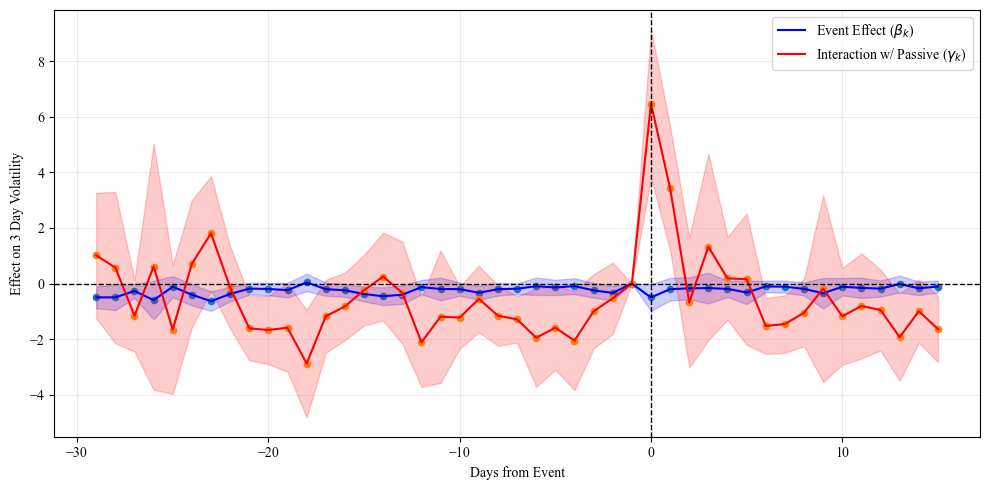

In [46]:
days = list(range(-29, 16))

def get_coef(key):
    return float(res2.params.get(key, 0.0))

def get_se(key):
    return float(res2.std_errors.get(key, 0.0))

# Build arrays for betas and gammas, with explicit 0 at day -1
betas = []
beta_se = []
gammas = []
gamma_se = []

for k in days:
    if k == -1:
        # omitted baseline: coefficient = 0, se = 0
        betas.append(0.0)
        beta_se.append(0.0)
        gammas.append(0.0)
        gamma_se.append(0.0)
    else:
        betas.append(get_coef(f'day_{k}'))
        beta_se.append(get_se(f'day_{k}'))
        gammas.append(get_coef(f'day_{k}_passive_hat'))
        gamma_se.append(get_se(f'day_{k}_passive_hat'))

betas = np.array(betas)
beta_se = np.array(beta_se)
gammas = np.array(gammas)
gamma_se = np.array(gamma_se)

# 95% CI bounds
beta_lower = betas - 1.96 * beta_se
beta_upper = betas + 1.96 * beta_se
gamma_lower = gammas - 1.96 * gamma_se
gamma_upper = gammas + 1.96 * gamma_se

# Plot: lines + shaded 95% CI + dots

plt.figure(figsize=(10,5))
plt.rcParams["font.family"] = "Times New Roman"

# βk
plt.plot(days, betas, label=r'Event Effect ($\beta_{k}$)', linewidth=1.5, color='blue')
plt.fill_between(days, beta_lower, beta_upper, alpha=0.2, color='blue')
plt.scatter(days, betas, s=20)

# γk
plt.plot(days, gammas, label=r'Interaction w/ Passive ($\gamma_{k}$)', linewidth=1.5, color='red')
plt.fill_between(days, gamma_lower, gamma_upper, alpha=0.2, color='red')
plt.scatter(days, gammas, s=20)

# Reference lines
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.xlabel('Days from Event')
plt.ylabel('Effect on 3 Day Volatility')

plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.savefig("Graphs/3vol_es_iv_cont_rob.png")
plt.show()

In [47]:
for k in range(-29, 16):
    data_cont[f'day_{k}'] = (data_cont['days_from_earn'] == k).astype(int)

for k in range(-29, 16):
    if k != -1:  
        data_cont[f'day_{k}_passive_hat'] = data_cont[f'day_{k}'] * data_cont['passive_hat']

event_dummies = [f'day_{k}' for k in range(-29, 16) if k != -1]
interaction_terms = [f'day_{k}_passive_hat' for k in range(-29, 16) if k != -1]
sector_dummies = pd.get_dummies(df['sector'], prefix='sector', drop_first=True, dtype=int)
df = pd.concat([df, sector_dummies], axis=1)

controls = ['passive_hat', 'ta', 'cash_sinvest', 'long_debt_tot', 'rev', 'net_inc', 'eps', 'vol']

X_vars = event_dummies + interaction_terms + controls + list(sector_dummies.columns)

data_cont['Date'] = pd.to_datetime(data_cont['Date'])
df = data_cont.set_index(['ticker', 'Date'])
df = pd.concat([df, sector_dummies], axis=1)

Y = df['5day_vol']
X = df[X_vars]

model2 = PanelOLS(Y, X, entity_effects=False, time_effects=False)
res2 = model2.fit(cov_type='clustered', cluster_entity=True)

print(res2.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:               5day_vol   R-squared:                        0.2405
Estimator:                   PanelOLS   R-squared (Between):              0.2916
No. Observations:              328775   R-squared (Within):              -0.0206
Date:                Thu, Nov 06 2025   R-squared (Overall):              0.2405
Time:                        18:36:09   Log-likelihood                -9.262e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      981.63
Entities:                        3497   P-value                           0.0000
Avg Obs:                       94.016   Distribution:              F(106,328669)
Min Obs:                       1.0000                                           
Max Obs:                       136.00   F-statistic (robust):             25.195
                            

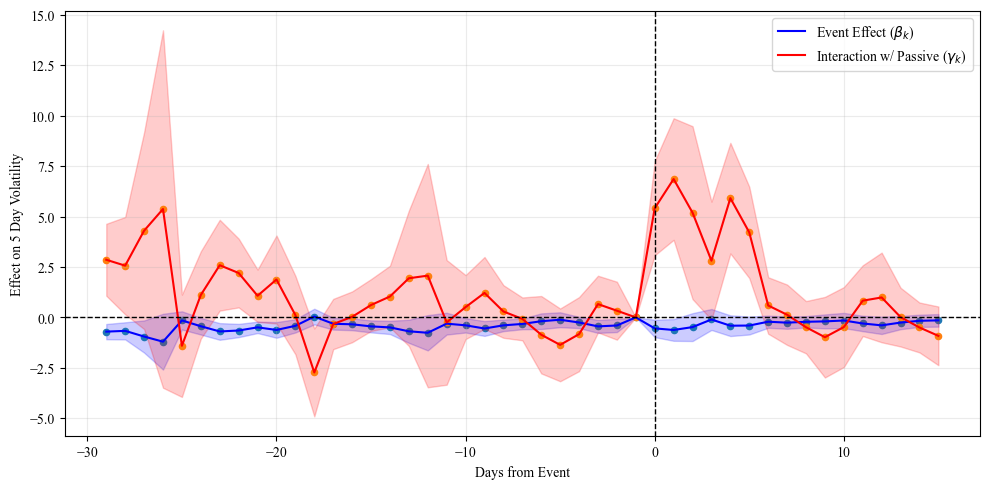

In [48]:
days = list(range(-29, 16))

def get_coef(key):
    return float(res2.params.get(key, 0.0))

def get_se(key):
    return float(res2.std_errors.get(key, 0.0))

# Build arrays for betas and gammas, with explicit 0 at day -1
betas = []
beta_se = []
gammas = []
gamma_se = []

for k in days:
    if k == -1:
        # omitted baseline: coefficient = 0, se = 0
        betas.append(0.0)
        beta_se.append(0.0)
        gammas.append(0.0)
        gamma_se.append(0.0)
    else:
        betas.append(get_coef(f'day_{k}'))
        beta_se.append(get_se(f'day_{k}'))
        gammas.append(get_coef(f'day_{k}_passive_hat'))
        gamma_se.append(get_se(f'day_{k}_passive_hat'))

betas = np.array(betas)
beta_se = np.array(beta_se)
gammas = np.array(gammas)
gamma_se = np.array(gamma_se)

# 95% CI bounds
beta_lower = betas - 1.96 * beta_se
beta_upper = betas + 1.96 * beta_se
gamma_lower = gammas - 1.96 * gamma_se
gamma_upper = gammas + 1.96 * gamma_se

# Plot: lines + shaded 95% CI + dots

plt.figure(figsize=(10,5))
plt.rcParams["font.family"] = "Times New Roman"

# βk
plt.plot(days, betas, label=r'Event Effect ($\beta_{k}$)', linewidth=1.5, color='blue')
plt.fill_between(days, beta_lower, beta_upper, alpha=0.2, color='blue')
plt.scatter(days, betas, s=20)

# γk
plt.plot(days, gammas, label=r'Interaction w/ Passive ($\gamma_{k}$)', linewidth=1.5, color='red')
plt.fill_between(days, gamma_lower, gamma_upper, alpha=0.2, color='red')
plt.scatter(days, gammas, s=20)

# Reference lines
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.xlabel('Days from Event')
plt.ylabel('Effect on 5 Day Volatility')

plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.savefig("Graphs/5vol_es_iv_cont_rob.png")
plt.show()

In [49]:
for k in range(-29, 16):
    data_cont[f'day_{k}'] = (data_cont['days_from_earn'] == k).astype(int)

for k in range(-29, 16):
    if k != -1:  
        data_cont[f'day_{k}_passive_hat'] = data_cont[f'day_{k}'] * data_cont['passive_hat']

event_dummies = [f'day_{k}' for k in range(-29, 16) if k != -1]
interaction_terms = [f'day_{k}_passive_hat' for k in range(-29, 16) if k != -1]
sector_dummies = pd.get_dummies(df['sector'], prefix='sector', drop_first=True, dtype=int)
df = pd.concat([df, sector_dummies], axis=1)

controls = ['passive_hat', 'ta', 'cash_sinvest', 'long_debt_tot', 'rev', 'net_inc', 'eps', 'vol']

X_vars = event_dummies + interaction_terms + controls + list(sector_dummies.columns)

data_cont['Date'] = pd.to_datetime(data_cont['Date'])
df = data_cont.set_index(['ticker', 'Date'])
df = pd.concat([df, sector_dummies], axis=1)

Y = df['7day_vol']
X = df[X_vars]

model2 = PanelOLS(Y, X, entity_effects=False, time_effects=False)
res2 = model2.fit(cov_type='clustered', cluster_entity=True)

print(res2.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:               7day_vol   R-squared:                        0.2509
Estimator:                   PanelOLS   R-squared (Between):              0.2925
No. Observations:              328775   R-squared (Within):              -0.0298
Date:                Thu, Nov 06 2025   R-squared (Overall):              0.2509
Time:                        18:36:24   Log-likelihood                -9.743e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1038.3
Entities:                        3497   P-value                           0.0000
Avg Obs:                       94.016   Distribution:              F(106,328669)
Min Obs:                       1.0000                                           
Max Obs:                       136.00   F-statistic (robust):             26.615
                            

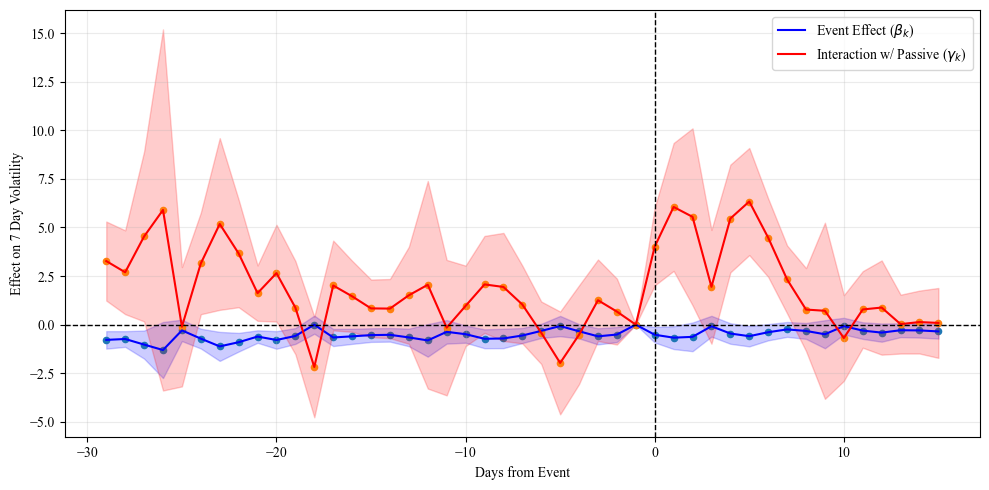

In [50]:
days = list(range(-29, 16))

def get_coef(key):
    return float(res2.params.get(key, 0.0))

def get_se(key):
    return float(res2.std_errors.get(key, 0.0))

# Build arrays for betas and gammas, with explicit 0 at day -1
betas = []
beta_se = []
gammas = []
gamma_se = []

for k in days:
    if k == -1:
        # omitted baseline: coefficient = 0, se = 0
        betas.append(0.0)
        beta_se.append(0.0)
        gammas.append(0.0)
        gamma_se.append(0.0)
    else:
        betas.append(get_coef(f'day_{k}'))
        beta_se.append(get_se(f'day_{k}'))
        gammas.append(get_coef(f'day_{k}_passive_hat'))
        gamma_se.append(get_se(f'day_{k}_passive_hat'))

betas = np.array(betas)
beta_se = np.array(beta_se)
gammas = np.array(gammas)
gamma_se = np.array(gamma_se)

# 95% CI bounds
beta_lower = betas - 1.96 * beta_se
beta_upper = betas + 1.96 * beta_se
gamma_lower = gammas - 1.96 * gamma_se
gamma_upper = gammas + 1.96 * gamma_se

# Plot: lines + shaded 95% CI + dots

plt.figure(figsize=(10,5))
plt.rcParams["font.family"] = "Times New Roman"

# βk
plt.plot(days, betas, label=r'Event Effect ($\beta_{k}$)', linewidth=1.5, color='blue')
plt.fill_between(days, beta_lower, beta_upper, alpha=0.2, color='blue')
plt.scatter(days, betas, s=20)

# γk
plt.plot(days, gammas, label=r'Interaction w/ Passive ($\gamma_{k}$)', linewidth=1.5, color='red')
plt.fill_between(days, gamma_lower, gamma_upper, alpha=0.2, color='red')
plt.scatter(days, gammas, s=20)

# Reference lines
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.xlabel('Days from Event')
plt.ylabel('Effect on 7 Day Volatility')

plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.savefig("Graphs/7vol_es_iv_cont_rob.png")
plt.show()

In [51]:
data_pj = pd.read_csv('Data/master_data_pj_rob.csv')
data_pj.drop(columns=["Unnamed: 0"], inplace=True)
data_pj = data_pj.dropna()
data_pj = data_pj.sort_values(['Date', 'ticker'])

In [52]:
sum_stats2 = data_pj[['price', 'vol', 'return', 'share_passive', 'PJ_ar1', 'PJ_mkt', 'PJ_sp']].describe()
sum_stats2

,price,vol,return,share_passive,PJ_ar1,PJ_mkt,PJ_sp
count,12235.000000,1.223500e+04,12235.000000,12235.000000,1.223500e+04,12235.000000,12235.000000
mean,60.168615,3.377446e+06,-0.000242,0.187511,4.986205e+02,3.011394,3.934216
std,172.607852,1.166095e+07,0.067812,0.158284,5.425050e+04,32.484987,112.232825
min,0.038800,0.000000e+00,-0.642470,0.000005,6.283924e-05,0.000087,0.000033
25%,7.775000,2.053830e+05,-0.025322,0.054606,3.729328e-01,0.383687,0.386428
50%,22.540000,7.540300e+05,-0.000711,0.153532,7.339220e-01,0.744043,0.745093
75%,60.990000,2.444678e+06,0.022039,0.258691,1.375631e+00,1.348290,1.355266
max,8064.090000,4.210580e+08,1.067376,0.946899,6.000528e+06,1969.425566,11861.635930


In [53]:
data_pj = data_pj[(data_pj['PJ_ar1'] >= -3) & (data_pj['PJ_ar1'] <= 3)]
data_pj = data_pj[(data_pj['PJ_mkt'] >= -3) & (data_pj['PJ_mkt'] <= 3)]
data_pj = data_pj[(data_pj['PJ_sp'] >= -3) & (data_pj['PJ_sp'] <= 3)]

In [54]:
data_pj['passive_q'] = pd.qcut(data_pj['share_passive'], q=4, labels=False) + 1

In [55]:
avg_PJ_ar1 = (data_pj.groupby(['Date', 'passive_q'])['PJ_ar1'].mean().reset_index())
avg_PJ_ar1 = avg_PJ_ar1.sort_values(['Date'])

/var/folders/5b/jc4253hj4rl3y0jlxy2y3trm0000gn/T/ipykernel_20844/586390983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub1['Date'] = pd.to_datetime(sub1['Date'])
/var/folders/5b/jc4253hj4rl3y0jlxy2y3trm0000gn/T/ipykernel_20844/586390983.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub2['Date'] = pd.to_datetime(sub2['Date'])
/var/folders/5b/jc4253hj4rl3y0jlxy2y3trm0000gn/T/ipykernel_20844/586390983.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

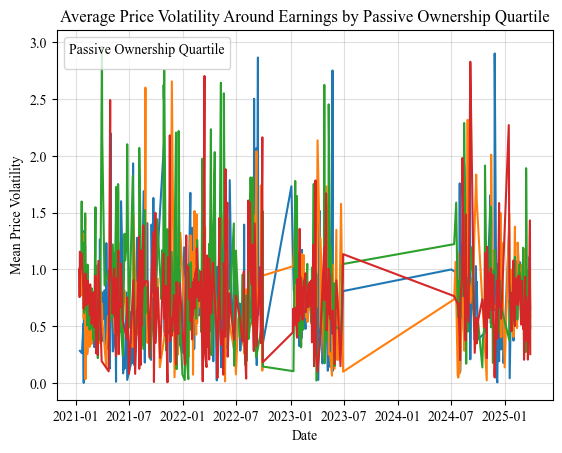

In [56]:

sub1 = avg_PJ_ar1[avg_PJ_ar1['passive_q'] == 1]
sub1['Date'] = pd.to_datetime(sub1['Date'])
plt.plot(sub1['Date'], sub1['PJ_ar1'])
sub2 = avg_PJ_ar1[avg_PJ_ar1['passive_q'] == 2]
sub2['Date'] = pd.to_datetime(sub2['Date'])
plt.plot(sub2['Date'], sub2['PJ_ar1'])
sub3 = avg_PJ_ar1[avg_PJ_ar1['passive_q'] == 3]
sub3['Date'] = pd.to_datetime(sub3['Date'])
plt.plot(sub3['Date'], sub3['PJ_ar1'])
sub4 = avg_PJ_ar1[avg_PJ_ar1['passive_q'] == 4]
sub4['Date'] = pd.to_datetime(sub4['Date'])
plt.plot(sub4['Date'], sub4['PJ_ar1'])

plt.title('Average Price Volatility Around Earnings by Passive Ownership Quartile')
plt.xlabel('Date')
plt.ylabel('Mean Price Volatility')
plt.legend(title='Passive Ownership Quartile')
plt.grid(True, alpha = 0.4)

plt.show()

In [57]:
#Stage one
X = data_pj[['share_passive']]
Z = sm.add_constant(data_pj[['in_sp']])
y = data_pj[['PJ_ar1']]
model1 = sm.OLS(X, Z)
model1_robust = model1.fit(cov_type='HC3')
x_hat = model1_robust.predict(Z)
print(model1_robust.summary())

                            OLS Regression Results                            
Dep. Variable:          share_passive   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                 1.390e+04
Date:                Thu, 06 Nov 2025   Prob (F-statistic):               0.00
Time:                        18:36:25   Log-Likelihood:                 7057.1
No. Observations:                9936   AIC:                        -1.411e+04
Df Residuals:                    9934   BIC:                        -1.410e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1472      0.001    111.248      0.0

In [58]:
X_hat = sm.add_constant(x_hat)
model2 = sm.OLS(y,X_hat)
model2_robust = model2.fit(cov_type='HC3')
print(model2_robust.summary())

                            OLS Regression Results                            
Dep. Variable:                 PJ_ar1   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.570
Date:                Thu, 06 Nov 2025   Prob (F-statistic):             0.0589
Time:                        18:36:25   Log-Likelihood:                -8904.8
No. Observations:                9936   AIC:                         1.781e+04
Df Residuals:                    9934   BIC:                         1.783e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7369      0.012     59.861      0.0

In [59]:
#Stage one
X = data_pj[['share_passive']]
Z = sm.add_constant(data_pj[['in_sp']])
y = data_pj[['PJ_mkt']]
model1 = sm.OLS(X, Z)
model1_robust = model1.fit(cov_type='HC3')
x_hat = model1_robust.predict(Z)
print(model1_robust.summary())

                            OLS Regression Results                            
Dep. Variable:          share_passive   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                 1.390e+04
Date:                Thu, 06 Nov 2025   Prob (F-statistic):               0.00
Time:                        18:36:25   Log-Likelihood:                 7057.1
No. Observations:                9936   AIC:                        -1.411e+04
Df Residuals:                    9934   BIC:                        -1.410e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1472      0.001    111.248      0.0

In [60]:
X_hat = sm.add_constant(x_hat)
model2 = sm.OLS(y,X_hat)
model2_robust = model2.fit(cov_type='HC3')
print(model2_robust.summary())

                            OLS Regression Results                            
Dep. Variable:                 PJ_mkt   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3492
Date:                Thu, 06 Nov 2025   Prob (F-statistic):              0.555
Time:                        18:36:25   Log-Likelihood:                -8223.4
No. Observations:                9936   AIC:                         1.645e+04
Df Residuals:                    9934   BIC:                         1.647e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7332      0.011     64.556      0.0

In [61]:
#Stage one
X = data_pj[['share_passive']]
Z = sm.add_constant(data_pj[['in_sp']])
y = data_pj[['PJ_sp']]
model1 = sm.OLS(X, Z)
model1_robust = model1.fit(cov_type='HC3')
x_hat = model1_robust.predict(Z)
print(model1_robust.summary())

                            OLS Regression Results                            
Dep. Variable:          share_passive   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                 1.390e+04
Date:                Thu, 06 Nov 2025   Prob (F-statistic):               0.00
Time:                        18:36:25   Log-Likelihood:                 7057.1
No. Observations:                9936   AIC:                        -1.411e+04
Df Residuals:                    9934   BIC:                        -1.410e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1472      0.001    111.248      0.0

In [62]:
X_hat = sm.add_constant(x_hat)
model2 = sm.OLS(y,X_hat)
model2_robust = model2.fit(cov_type='HC3')
print(model2_robust.summary())

                            OLS Regression Results                            
Dep. Variable:                  PJ_sp   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8506
Date:                Thu, 06 Nov 2025   Prob (F-statistic):              0.356
Time:                        18:36:25   Log-Likelihood:                -7990.0
No. Observations:                9936   AIC:                         1.598e+04
Df Residuals:                    9934   BIC:                         1.600e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7222      0.011     65.310      0.0

In [63]:
data_pj_cont = pd.read_csv('Data/master_data_pj_controls.csv')
data_pj_cont.drop(columns=["Unnamed: 0"], inplace=True)
data_pj_cont = data_pj_cont.dropna()

In [64]:
data_pj_cont = data_pj_cont[(data_pj_cont['PJ_ar1'] >= -3) & (data_pj_cont['PJ_ar1'] <= 3)]
data_pj_cont = data_pj_cont[(data_pj_cont['PJ_mkt'] >= -3) & (data_pj_cont['PJ_mkt'] <= 3)]
data_pj_cont = data_pj_cont[(data_pj_cont['PJ_sp'] >= -3) & (data_pj_cont['PJ_sp'] <= 3)]

In [65]:
#Stage one
df = data_pj_cont.copy()

df['Date'] = pd.to_datetime(df['Date'])

# Create sector dummies (drop first)
sector_dummies = pd.get_dummies(df['sector'], prefix='sector', drop_first=True, dtype=float)

# Combine with main data
df = pd.concat([df, sector_dummies], axis=1)

# Define variables
controls = ['ta', 'cash_sinvest', 'long_debt_tot', 'rev', 'net_inc', 'eps', 'vol']
instrument = ['in_sp']
Z_vars = instrument + controls + list(sector_dummies.columns)

# Keep only needed columns
Z = df[Z_vars].copy()
X = df['share_passive'].copy()

# Convert all to numeric (force coercion)
Z = Z.apply(pd.to_numeric, errors='coerce')
X = pd.to_numeric(X, errors='coerce')

# Drop rows with missing data
valid_rows = Z.notna().all(axis=1) & X.notna()
Z = Z.loc[valid_rows]
X = X.loc[valid_rows]

# Add constant
Z = sm.add_constant(Z)

# Fit first stage
model1 = sm.OLS(X, Z)
model1_robust = model1.fit(cov_type='HC3')

X_hat = model1_robust.fittedvalues

print(model1_robust.summary())

                            OLS Regression Results                            
Dep. Variable:          share_passive   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     389.7
Date:                Thu, 06 Nov 2025   Prob (F-statistic):               0.00
Time:                        18:36:26   Log-Likelihood:                 7544.6
No. Observations:                8301   AIC:                        -1.505e+04
Df Residuals:                    8282   BIC:                        -1.492e+04
Df Model:                          18                                         
Covariance Type:                  HC3                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1074      0.006     18.783

/opt/anaconda3/envs/econ/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 18, but rank is 17
  warnings.warn('covariance of constraints does not have full '


In [66]:
#second stage
y = df['PJ_ar1']
X_vars = pd.concat([X_hat, df[controls + list(sector_dummies.columns)]], axis=1)
X_vars = sm.add_constant(X_vars)
model2 = sm.OLS(y, X_vars)
model2_robust = model2.fit(cov_type='HC3')
print(model2_robust.summary())

                            OLS Regression Results                            
Dep. Variable:                 PJ_ar1   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.131
Date:                Thu, 06 Nov 2025   Prob (F-statistic):            0.00433
Time:                        18:36:26   Log-Likelihood:                -7451.1
No. Observations:                8301   AIC:                         1.494e+04
Df Residuals:                    8282   BIC:                         1.507e+04
Df Model:                          18                                         
Covariance Type:                  HC3                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6795      0.031     21.943

/opt/anaconda3/envs/econ/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 18, but rank is 17
  warnings.warn('covariance of constraints does not have full '


In [67]:
#second stage
y = df['PJ_mkt']
X_vars = pd.concat([X_hat, df[controls + list(sector_dummies.columns)]], axis=1)
X_vars = sm.add_constant(X_vars)
model2 = sm.OLS(y, X_vars)
model2_robust = model2.fit(cov_type='HC3')
print(model2_robust.summary())

/opt/anaconda3/envs/econ/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 18, but rank is 17
  warnings.warn('covariance of constraints does not have full '


                            OLS Regression Results                            
Dep. Variable:                 PJ_mkt   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.785
Date:                Thu, 06 Nov 2025   Prob (F-statistic):             0.0242
Time:                        18:36:26   Log-Likelihood:                -6753.7
No. Observations:                8301   AIC:                         1.355e+04
Df Residuals:                    8282   BIC:                         1.368e+04
Df Model:                          18                                         
Covariance Type:                  HC3                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6745      0.028     24.449

In [68]:
#second stage
y = df['PJ_sp']
X_vars = pd.concat([X_hat, df[controls + list(sector_dummies.columns)]], axis=1)
X_vars = sm.add_constant(X_vars)
model2 = sm.OLS(y, X_vars)
model2_robust = model2.fit(cov_type='HC3')
print(model2_robust.summary())

                            OLS Regression Results                            
Dep. Variable:                  PJ_sp   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.545
Date:                Thu, 06 Nov 2025   Prob (F-statistic):             0.0700
Time:                        18:36:26   Log-Likelihood:                -6639.3
No. Observations:                8301   AIC:                         1.332e+04
Df Residuals:                    8282   BIC:                         1.345e+04
Df Model:                          18                                         
Covariance Type:                  HC3                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6635      0.028     23.781

/opt/anaconda3/envs/econ/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 18, but rank is 17
  warnings.warn('covariance of constraints does not have full '
